Libraries for text processing and handling text data

In [77]:
import pandas as pd
import numpy as np 

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:

import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from collections import Counter

# all the required models 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
from nltk.stem import SnowballStemmer

Code to display all columns

In [83]:
pd.set_option('display.max_columns', None) 

To check the Dataset Path

In [84]:
import os
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset\completeSpamAssassin.csv
Dataset\emails.csv
Dataset\spam.csv


Reading Data file - This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification

In [85]:
df = pd.read_csv("Dataset/emails.csv")

Checking for data 

In [86]:
df.head(10)

Email No.  the  to  ect  and  for  of    a  you  hou  in  on  is  this  \
0   Email 1    0   0    1    0    0   0    2    0    0   0   0   1     0   
1   Email 2    8  13   24    6    6   2  102    1   27  18  21  13     0   
2   Email 3    0   0    1    0    0   0    8    0    0   4   2   0     0   
3   Email 4    0   5   22    0    5   1   51    2   10   1   5   9     2   
4   Email 5    7   6   17    1    5   2   57    0    9   3  12   2     2   
5   Email 6    4   5    1    4    2   3   45    1    0  16  12   8     1   
6   Email 7    5   3    1    3    2   1   37    0    0   9   4   6     2   
7   Email 8    0   2    2    3    1   2   21    6    0   2   6   2     0   
8   Email 9    2   2    3    0    0   1   18    0    0   3   3   2     1   
9  Email 10    4   4   35    0    1   0   49    1   16   9   4   1     0   

   enron   i  be  that  will  have  with  your  at  we   s  are  it  by  com  \
0      0   2   0     0     0     0     0     0   0   0   3    0   0   0    0   
1      1  61   4     2     0     0     2     0  12   9  95    4   3   3    3   
2      0   8   0     0     0     0     0     0   2   0   2    0   0   0    0   
3      0  16   2     0     0     1     1     0   2   1  36    3   1   2    0   
4      0  30   8     0     0     2     0     0   7   0  19    2   4   2    0   
5      0  52   2     0     0     0     1     0   5   5  56    2   7   1    1   
6      0  27   1     0     0     0     0     0   7   1  40    0   0   0    0   
7      0  28   1     0     1     0     0     5   1   0  23    0   1   0    0   
8      0  15   0     1     0     0     0     0   3   2   6    0   0   0    0   
9      0  35  10     0     2     1     1     0   3   1  37    0   1   1    0   

   as  from  gas  or  not  me  deal  if  meter  hpl  please  re    e  any  \
0   1     0    0   0    0   0     0   0      0    0       0   2    4    0   
1  12     3    1  21    1  12     0   1      0    0       2  15  141    0   
2   2     0    2   0    0   0     0   0      0    0       0   0    3    0   
3   2     3    0  10    2   5     2   0      1    0       0  10   79    0   
4   4     1    2   6    0   6     0   0      3    0       1  10   71    0   
5  10     0    0  10    0   5     0   1      0    0       0  20  112    0   
6  11     1    5   2    0   6     1   2      4    1       1   2   56    0   
7   2     0    0   5    0   2     0   0      0    0       1   9   34    1   
8   0     0    0   3    0   2     0   0      1    0       0   6   38    0   
9   4     2    1   4    2   4     0   2      0    0       1   6  115    0   

   our  corp  can   d  all  has  was  know  need  an  forwarded  new   t  may  \
0    0     0    0   0    0    0    0     0     0   0          0    0   4    0   
1   21     1    1  39    1    0    0     0     0  14          3    0  91    0   
2    0     0    0   3    0    0    0     0     0   0          0    0   3    0   
3    0     0    1  21    0    2    0     0     0   3          2    0  49    0   
4    0     0    1  11    8    0    1     0     0   9          2    0  63    0   
5    2     0    0  37    2    2    0     0     0   8          0    1  55    0   
6    0     0    1  13    0    0    0     0     1   7          0    0  45    0   
7    6     0    0  17    0    0    0     0     0   7          0    0  18    0   
8    0     0    0  10    1    0    0     1     1   4          0    0  24    0   
9    2     0    0  22    0    0    0     0     0  13          1    0  63    0   

   up  j  mmbtu  should  do  am  get  out  see  no  there  price  daren  but  \
0   0  1      0       0   0   0    0    0    0   0      0      0      0    0   
1   2  8      0       0   0   7    2    1    1   5      0      0      3    0   
2   0  1      0       0   1   0    0    0    0   2      0      0      0    0   
3   0  5      0       0   1   9    0    0    1   3      0      0      2    0   
4   0  3      0       1   0   1    1    0    0   9      3      0      1    0   
5   1  1      0       0   2   0    0    0    0   1      0      0

Size of the Data 

In [87]:
df.shape

(5172, 3002)

In [88]:
df.describe()

the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      2.627030    55.517401     2.466551     2.024362    10.600155   
std       6.229845    87.574172     4.314444     6.967878    19.281892   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    12.000000     0.000000     0.000000     1.000000   
50%       1.000000    28.000000     1.000000     0.000000     5.000000   
75%       2.000000    62.250000     3.000000     1.000000    12.000000   
max      77.000000  1898.000000    70.000000   167.000000   223.000000   

                on           is         this        enron            i  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean     10.935808     5.386118     1.388631     1.335267    45.857889   
std      17.999402     9.144407     2.849708     4.570525    77.832221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     8.000000   
50%       5.000000     2.000000     0.000000     0.000000    22.000000   
75%      12.000000     6.000000     2.000000     1.000000    49.000000   
max     302.000000   111.000000    36.000000   146.000000   972.000000   

                be         that         will         have         with  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      3.229312     0.924401     0.850928     0.804718     0.939675   
std       5.045836     2.084255     2.065738     1.444839     2.036278   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       4.000000     1.000000     1.000000     1.000000     1.000000   
max      67.000000    26.000000    53.000000    17.000000    26.000000   

              your           at           we            s          are  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      0.814385     6.932328     1.978732    41.811872     1.408546   
std       2.001731    12.949766     3.719254    66.530032     2.583277   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     8.000000     0.000000   
50%       0.000000     3.000000     1.000000    20.000000     0.000000   
75%       1.000000     7.000000     2.000000    46.000000     2.000000   
max      20.000000   267.000000    63.000000   882.000000    31.000000   

                it           by          com           as         from  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      4.501160     0.657386     1.767208     4.807425     0.813998   
std       8.377237     1.247460    11.002626     7.568755     1.657193   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       2.000000     0.000000     0.000000     2.000000     0.000000   
75%       5.000000     1.000000     1.000000     6.000000     1.000000   
max     131.000000    14.000000   726.000000   135.000000    21.000000   

             

In [89]:
df.drop(columns=['Email No.'],inplace=True)
df.corr()

the        to       ect       and       for        of  \
the         1.000000  0.852715  0.337249  0.841200  0.784112  0.796397   
to          0.852715  1.000000  0.375480  0.825474  0.781971  0.752722   
ect         0.337249  0.375480  1.000000  0.272863  0.369777  0.178028   
and         0.841200  0.825474  0.272863  1.000000  0.751287  0.809665   
for         0.784112  0.781971  0.369777  0.751287  1.000000  0.681457   
...              ...       ...       ...       ...       ...       ...   
military    0.129466  0.091639 -0.007690  0.084147  0.067151  0.073004   
allowing    0.127019  0.120059  0.004368  0.124766  0.121057  0.108786   
ff          0.341878  0.406666  0.141460  0.400225  0.301074  0.444252   
dry         0.051021  0.071388  0.002492  0.042484  0.038126  0.026403   
Prediction -0.004421  0.055277 -0.120782  0.114364 -0.003101  0.197234   

                   a       you       hou        in        on        is  \
the         0.784451  0.471392  0.303621  0.845670  0.731607  0.803790   
to          0.896466  0.508513  0.347993  0.881759  0.839835  0.859470   
ect         0.400009  0.155783  0.974152  0.298387  0.505063  0.385887   
and         0.815196  0.476764  0.235953  0.874276  0.751678  0.795315   
for         0.744098  0.495852  0.329051  0.762659  0.715465  0.754241   
...              ...       ...       ...       ...       ...       ...   
military    0.111685  0.006498  0.005429  0.120620  0.063902  0.089348   
allowing    0.105358  0.082757 -0.000966  0.138099  0.084938  0.084683   
ff          0.464473  0.195058  0.114210  0.448303  0.574647  0.405984   
dry         0.093822  0.028883  0.000601  0.077751  0.066633  0.070741   
Prediction  0.107776  0.130293 -0.128340  0.154055  0.056968  0.113277   

                this     enron         i        be      that      will  \
the         0.734221  0.200423  0.818990  0.743079  0.767052  0.563711   
to          0.728995  0.236351  0.897928  0.817356  0.684976  0.536891   
ect         0.288408  0.668960  0.331548  0.420845  0.276266  0.283387   
and         0.699667  0.192796  0.855299  0.736971  0.653001  0.530782   
for         0.706979  0.230163  0.751743  0.692902  0.617378  0.446210   
...              ...       ...       ...       ...       ...       ...   
military    0.027254 -0.013524  0.113687  0.086416  0.104582  0.020264   
allowing    0.075098 -0.001783  0.117955  0.074471  0.035480  0.049478   
ff          0.257719  0.122951  0.502243  0.364595  0.234636  0.258848   
dry         0.004158  0.002558  0.082963  0.083518  0.029061  0.015621   
Prediction  0.032906 -0.186740  0.175059  0.057937 -0.005234 -0.111063   

                have      with      your        at        we         s  \
the         0.624581  0.753228  0.314192  0.811642  0.703162  0.838884   
to          0.583980  0.735042  0.376937  0.857951  0.682258  0.912516   
ect         0.276757  0.229789  0.060380  0.316540  0.346228  0.373317   
and         0.531632  0.767693  0.360467  0.811550  0.652071  0.860236   
for         0.533637  0.682350  0.359309  0.748789  0.578599  0.783422   
...              ...       ...       ...       ...       ...       ...   
military    0.038195  0.096436  0.016213  0.109474  0.096845  0.117527   
allowing    0.076252  0.120142  0.093600  0.112898  0.048610  0.115671   
ff          0.200027  0.338398  0.170102  0.396270  0.278806  0.484323   
dry         0.047802  0.031150  0.021356  0.064620  0.047055  0.083474   
Prediction -0.089093  0.124827  0.186149  0.091398 -0.007344  0.134522   

                 are        it        by       com        as      from  \
the         0.714561  0.817035  0.615609  0.230444  0.762845  0.643787   
to          0.714609  0.857880  0.624210  0.305178  0.817480  0.654231   
ect         0.310674  0.290970  0.432866  0.056972  0.400830  0.359378   
and         0.675722  0.828775  0.556739  0.318568  0.740626  0.560929   
for         0.652008  0.719323  0.625723  0.234089  0.731349  0.617342   
...              

In [90]:
X=df.drop(['Prediction'], axis=1)
Y = df['Prediction']

Splitting data into test and train

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Project uses Multinomial Naive Bayes model, which is well-suited for text classification tasks

In [92]:
mnb = MultinomialNB()

In [93]:
classifiers = {
    'MultinomialNB' : mnb     
}

In [96]:
mnb.fit(X_train,Y_train)
    
Y_pred = mnb.predict(X_test)

<Axes: >

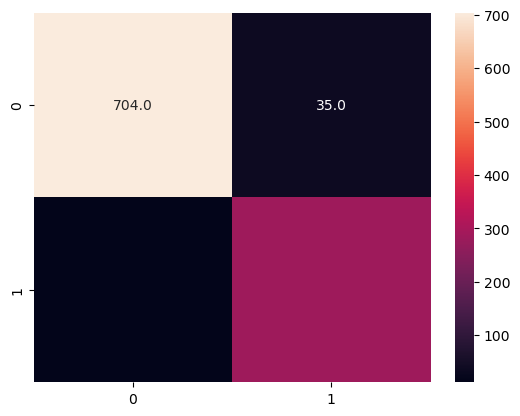

In [ ]:
mnb_corr=confusion_matrix(Y_test, Y_pred)
sns.heatmap(mnb_corr,annot=True, fmt= '.1f')

Testing with the Different dataset

In [97]:
df = pd.read_csv('Dataset/completeSpamAssassin.csv')
df.head()

Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1

In [98]:
#How big is data?
df.shape

(6046, 3)

In [99]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [100]:
# Are there any missing values?
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [101]:
# Are there any duplicate values?
df.duplicated().sum()

0

In [102]:
# dropping null values
df.dropna(inplace=True)

EDA Diagram

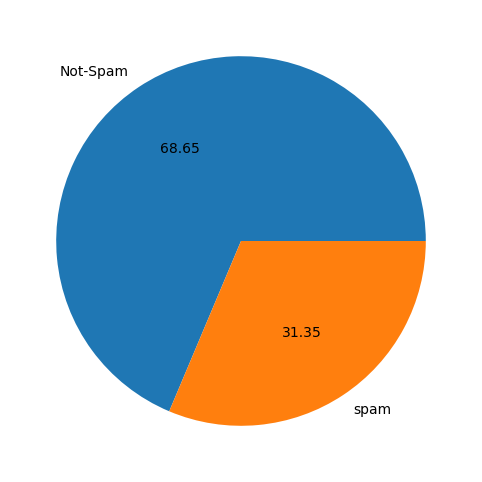

In [103]:
# Let's see the distribution of target variable
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['Not-Spam','spam'], autopct='%0.2f')
plt.show()

In [ ]:
df.corr(numeric_only=True)

Unnamed: 0     Label
Unnamed: 0    1.000000 -0.803518
Label        -0.803518  1.000000

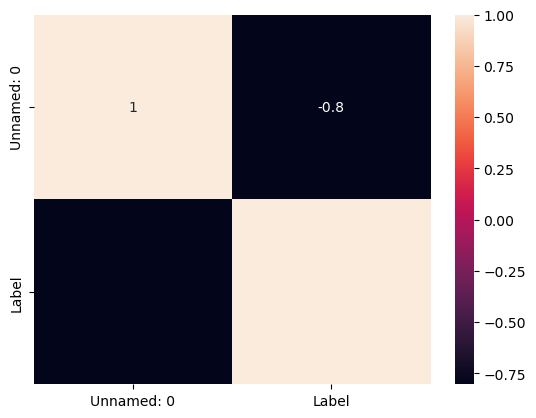

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

TEXT PREPROCESSING

In [ ]:
def text_preprocessing(text):
    # convert  text to lowecase
    text = text.lower()
    
    # creating list of words in email
    text = nltk.word_tokenize(text)
    
    # removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # copying processed text to text and clearing y to store next steps output
    text = y[:]
    y.clear()
    
    # removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # stemming 
    stemmer = SnowballStemmer('english')
    for i in text:
        y.append(stemmer.stem(i))
        
    return " ".join(y)

In [ ]:
df['clean_text'] = df['Body'].apply(text_preprocessing)

Creating list of all the words in processed spam emails

In [ ]:

spam_corpus = []
for mail in df[df['Label'] == 1]['clean_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)

# number of words in all spam mails
len(spam_corpus)

276886

Top 50 most occuring words in spam mails

c:\Users\Manisha\anaconda3\envs\ece5831-2023-py3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Manisha\anaconda3\envs\ece5831-2023-py3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Manisha\anaconda3\envs\ece5831-2023-py3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


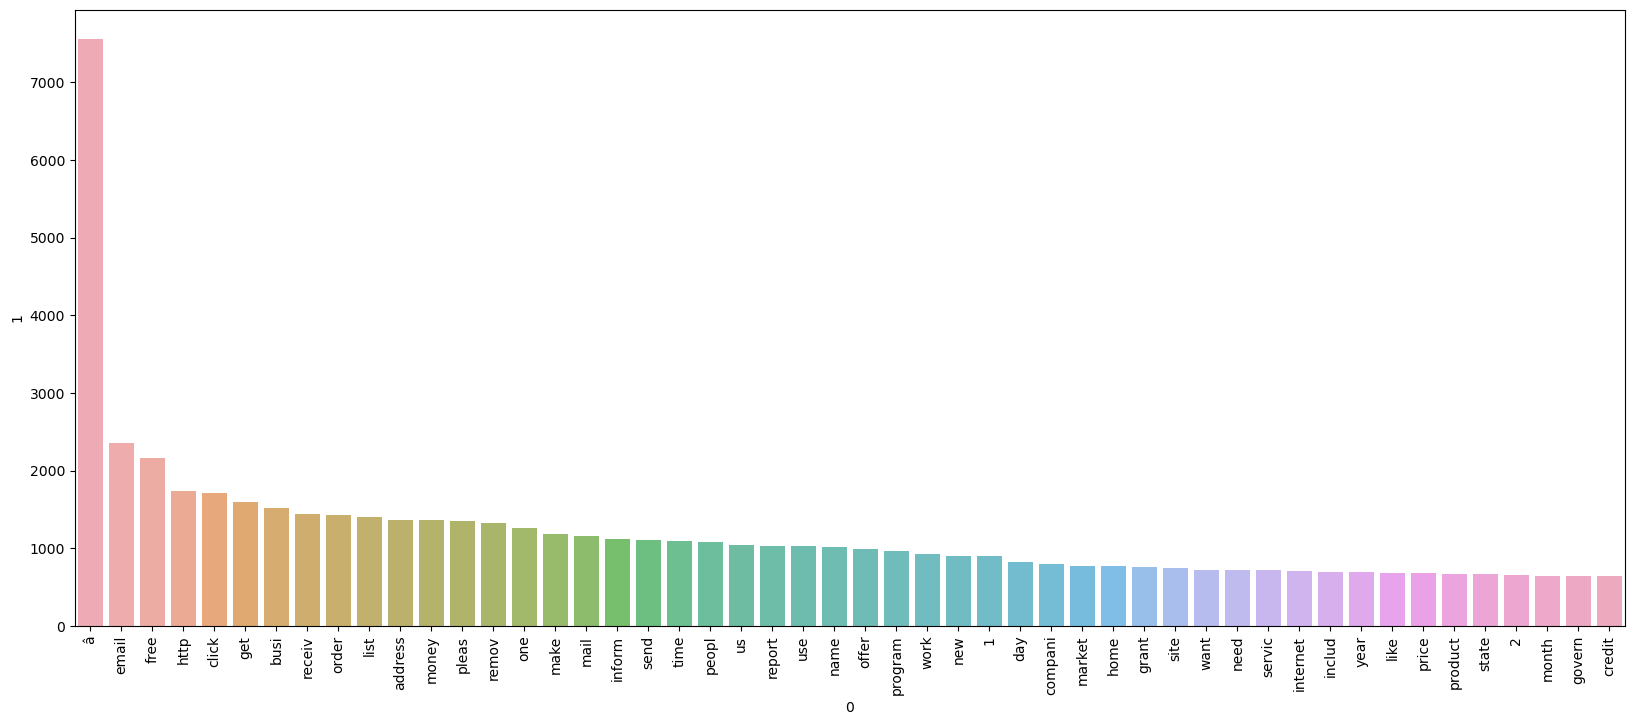

In [ ]:

plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

Creating list of all the words in processed ham emails

In [ ]:

ham_corpus = []
for mail in df[df['Label'] == 0]['clean_text'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

# number of words in all ham mails
len(ham_corpus)

547669

Top 50 most occuring words in ham mails

c:\Users\Manisha\anaconda3\envs\ece5831-2023-py3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Manisha\anaconda3\envs\ece5831-2023-py3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Manisha\anaconda3\envs\ece5831-2023-py3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


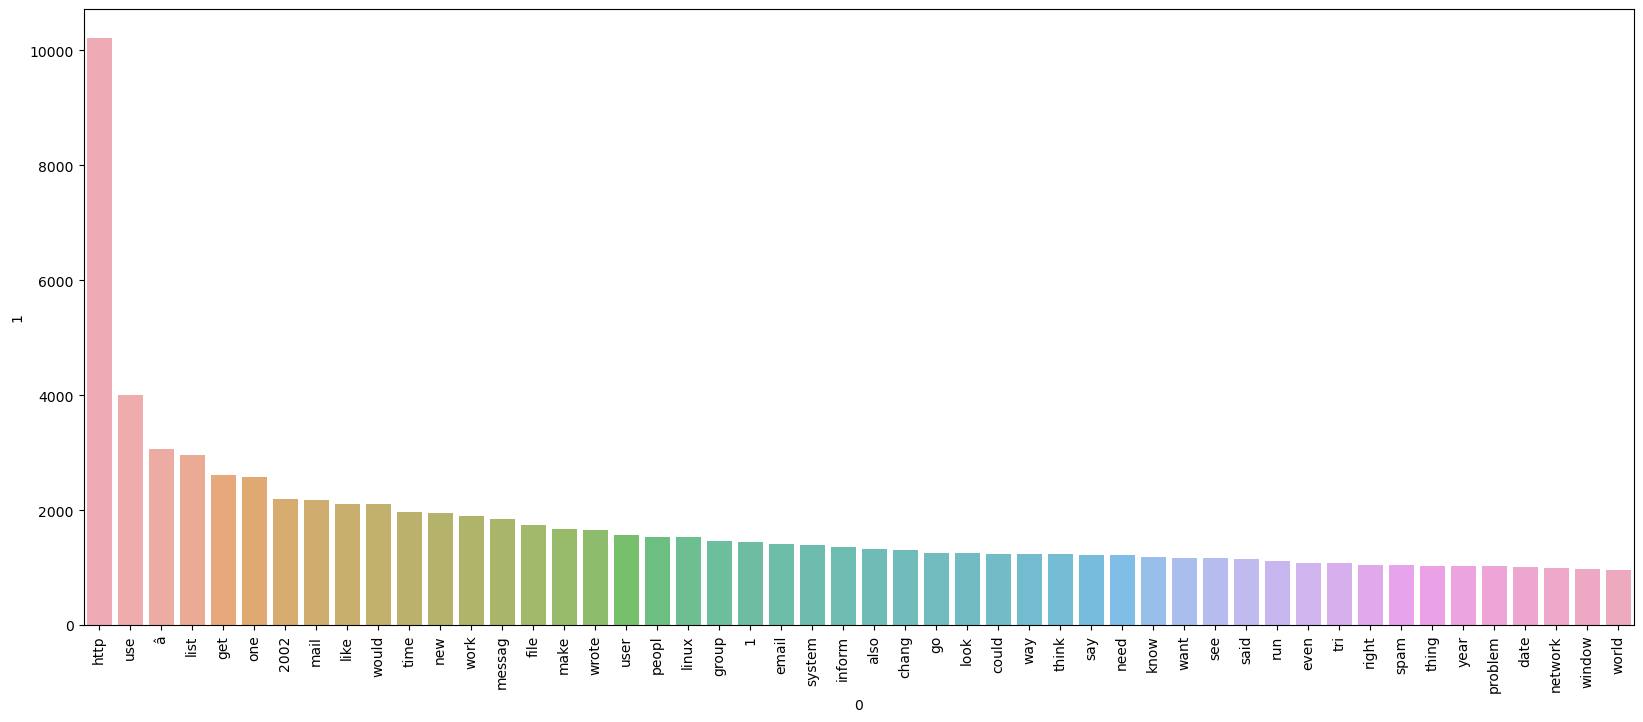

In [ ]:

plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1], alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

Setting up features and target as x and y

In [ ]:


# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)


x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Label'].values

Splitting the testing and training sets

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Creating a function to train list of algorithms and give accuracy , precision score

In [ ]:

def train_classifier(classifiers,x_train,y_train,x_test,y_test):
    
    classifiers.fit(x_train,y_train)
    
    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()
    return accuracy,precision

Training and accuracy of the models on training data

0.9371381306865177
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       835
           1       0.90      0.90      0.90       374

    accuracy                           0.94      1209
   macro avg       0.93      0.93      0.93      1209
weighted avg       0.94      0.94      0.94      1209



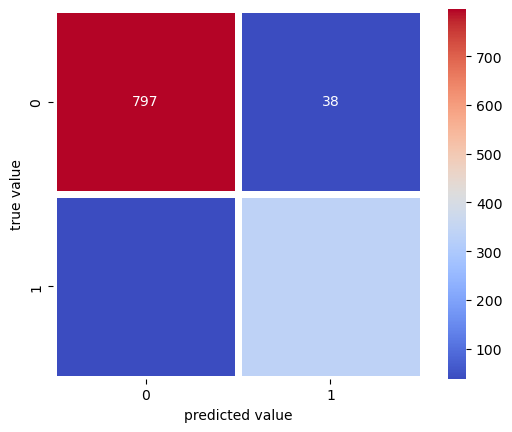

For  MultinomialNB
Accuracy -  0.9371381306865177
Precision -  0.8983957219251337 



In [ ]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []


for name,classifiers in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(classifiers, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,'\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)